In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
palette=sns.color_palette("rocket")


from pcoptim import LeastSquares
from pcoptim import coordinate_descent, gradient_descent, greedy_coordinate_descent
from pydaha.datasets.normal import make_regression
from pydaha.optimals import optimal_objective

In [2]:
p = 2

w0 = [0] * p

w = [0] * p
w[0] = 200
w[1] = -1

X, y, _ = make_regression(1000, p, w, seed=42)
X[:,1] += 0.05*X[:,0]

In [3]:
loss = LeastSquares(X, y)
coef, opt = optimal_objective(X, y, "ls", "none", "none")

w0[0] = 0#-100
w0[1] = 0# coef[1]

In [4]:
epsilon, delta =1, 1e-6
clip = 200
T=10
Tn=7

ret2 = gradient_descent(loss, w0, max_iter=Tn, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params2 = np.array(ret2.params_)

ret3 = greedy_coordinate_descent(loss, w0, max_iter=Tn, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params3 = np.array(ret3.params_)


In [5]:
def plot_contour(ax, loss, npoints=100):
    xlist = np.linspace(-50.0, 300.0, npoints)
    ylist = np.linspace(-40.0, 30.0, npoints)
    xx, yy = np.meshgrid(xlist, ylist)

    zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])

    
    ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
    contours = ax.contour(xx, yy, zz, cmap="PuRd")
    
    plt.clabel(contours, inline=1, fontsize=12)


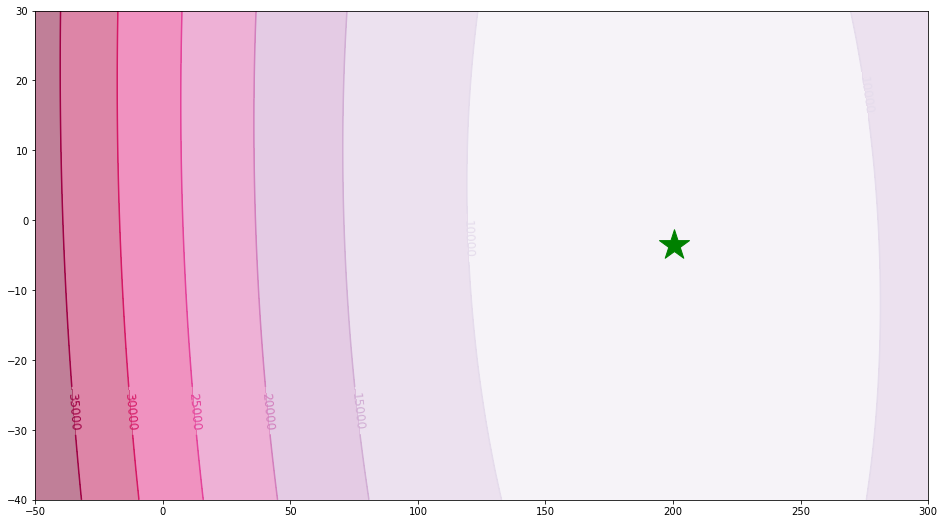

In [6]:
fig,ax=plt.subplots(1,1,figsize=(16,9))
plot_contour(ax, loss)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="green")

#plt.axis("off")
plt.savefig("example_none.pdf", bbox_inches="tight")

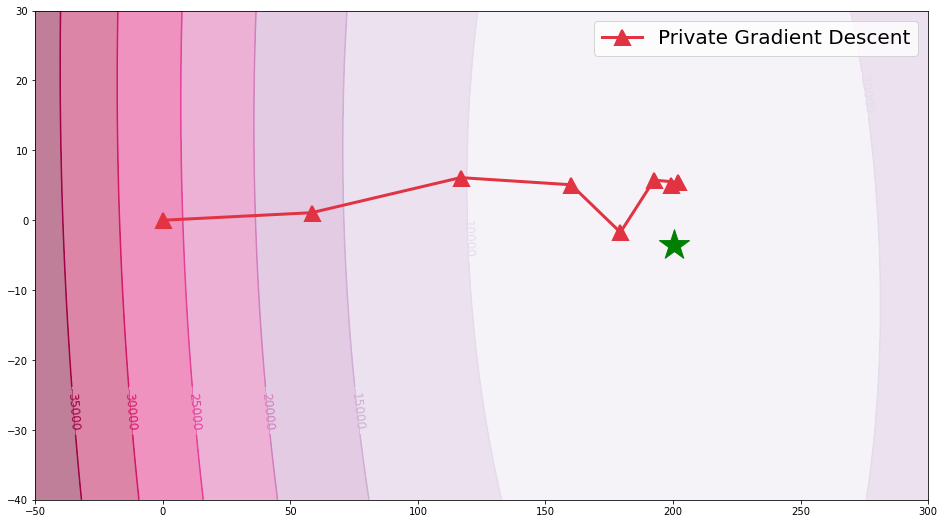

In [17]:
fig,ax=plt.subplots(1,1,figsize=(16,9))
plot_contour(ax, loss)

ax.scatter(coef[0], coef[1], marker="*", s=1000, color="green")

hdl1, = ax.plot(params2[:,0], params2[:,1],
                lw=3,
                color=palette[3], marker="^", markersize=15, markeredgewidth=2)

ax.legend([hdl1],
          ["Private Gradient Descent", "Private Greedy Coordinate Descent"],
         fontsize=20)

#ax.axis("off")
fig.savefig("example_private_only_gd.pdf", bbox_inches="tight")

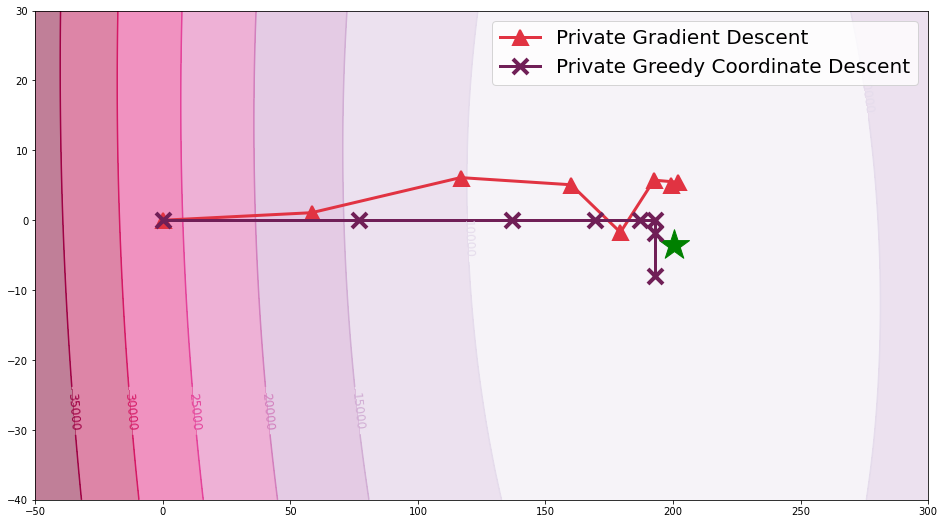

In [18]:
fig,ax=plt.subplots(1,1,figsize=(16,9))
plot_contour(ax, loss)

ax.scatter(coef[0], coef[1], marker="*", s=1000, color="green")

hdl1, = ax.plot(params2[:,0], params2[:,1],
                lw=3,
                color=palette[3], marker="^", markersize=15, markeredgewidth=2)

hdl2, = ax.plot(params3[:,0], params3[:,1],
                lw=3, 
                 color=palette[1], marker="x", markersize=15, markeredgewidth=4)
    
ax.legend([hdl1, hdl2],
          ["Private Gradient Descent", "Private Greedy Coordinate Descent"],
         fontsize=20)

#ax.axis("off")
fig.savefig("example_private.pdf", bbox_inches="tight")

###### epsilon, delta =1, 1e-6
clip = 200
T=10
Tn=7

ret2_nopriv = gradient_descent(loss, w0, max_iter=Tn, epochs=False, nb_logs=1000, learning_rate=1,clip=clip)
params2_nopriv = np.array(ret2_nopriv.params_)

ret3_nopriv = greedy_coordinate_descent(loss, w0, max_iter=Tn, epochs=False, nb_logs=1000, learning_rate=1,clip=clip)
params3_nopriv = np.array(ret3_nopriv.params_)


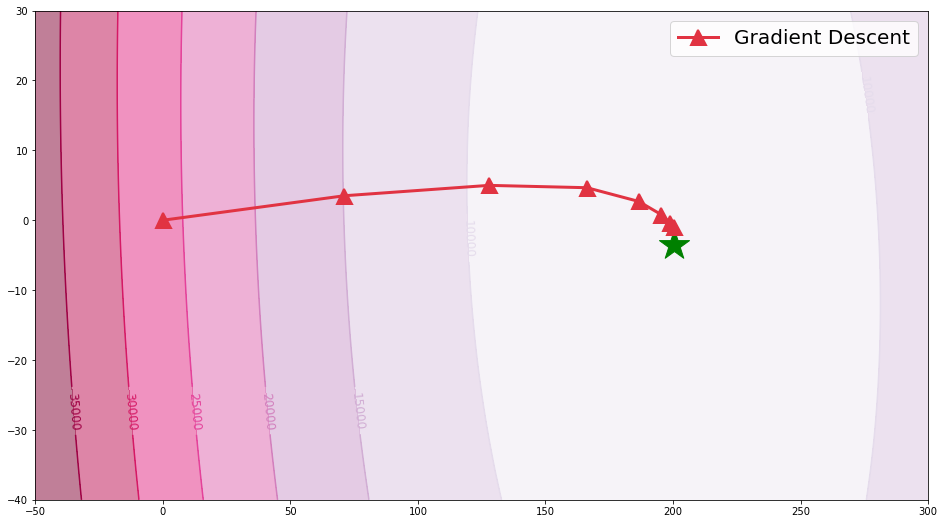

In [15]:
fig,ax=plt.subplots(1,1,figsize=(16,9))
plot_contour(ax, loss)

ax.scatter(coef[0], coef[1], marker="*", s=1000, color="green")

hdl1, = ax.plot(params2_nopriv[:,0], params2_nopriv[:,1],
                lw=3,
                color=palette[3], marker="^", markersize=15, markeredgewidth=2)

ax.legend([hdl1],
          ["Gradient Descent", "Greedy Coordinate Descent"],
         fontsize=20)

#ax.axis("off")
fig.savefig("example_non_private_only_gd.pdf", bbox_inches="tight")

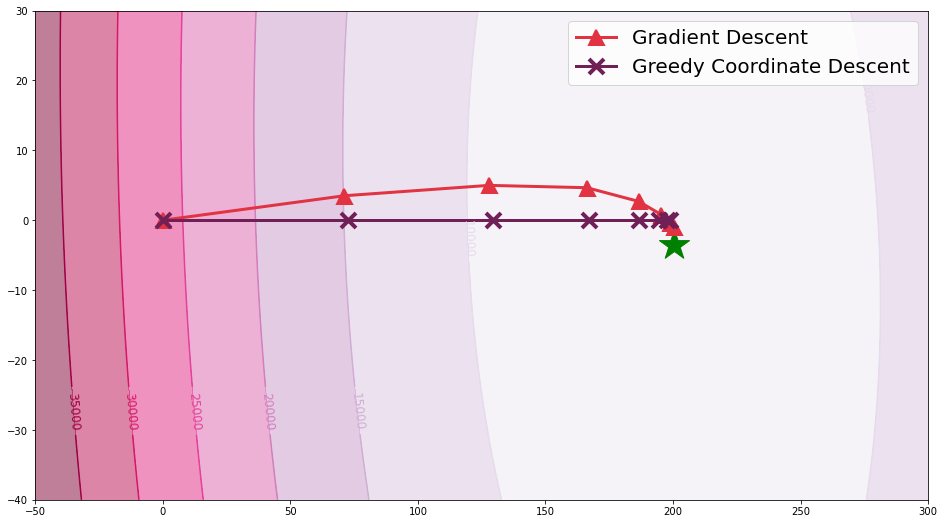

In [9]:
fig,ax=plt.subplots(1,1,figsize=(16,9))
plot_contour(ax, loss)

ax.scatter(coef[0], coef[1], marker="*", s=1000, color="green")

hdl1, = ax.plot(params2_nopriv[:,0], params2_nopriv[:,1],
                lw=3,
                color=palette[3], marker="^", markersize=15, markeredgewidth=2)

hdl2, = ax.plot(params3_nopriv[:,0], params3_nopriv[:,1],
                lw=3, 
                 color=palette[1], marker="x", markersize=15, markeredgewidth=4)
    
ax.legend([hdl1, hdl2],
          ["Gradient Descent", "Greedy Coordinate Descent"],
         fontsize=20)

#ax.axis("off")
fig.savefig("example_non_private.pdf", bbox_inches="tight")

In [10]:
rng = np.random.default_rng(seed=42)

grad = rng.lognormal(sigma=2,size=20)
grad *= np.array([1 if rng.random() < 0.75 else -1 for i in range(20)])
grad *= grad * np.sign(grad)
grad /= np.max(np.abs(grad))

noise = rng.normal(scale=0.2*np.sqrt(20), size=20)
noise_small = noise / np.sqrt(20)

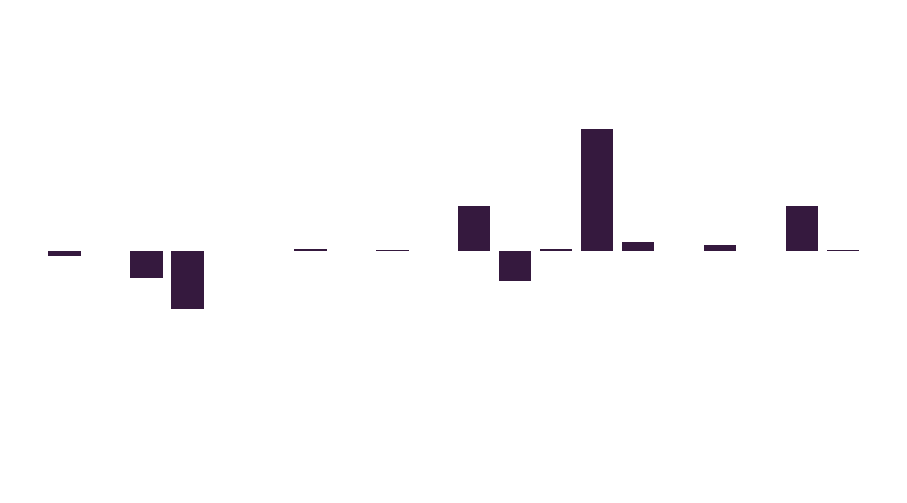

In [11]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.bar(np.arange(20), grad, color=palette[0])
plt.ylim(-2, 2)
plt.axis("off")

plt.savefig("base_gradient.pdf", bbox_inches="tight")

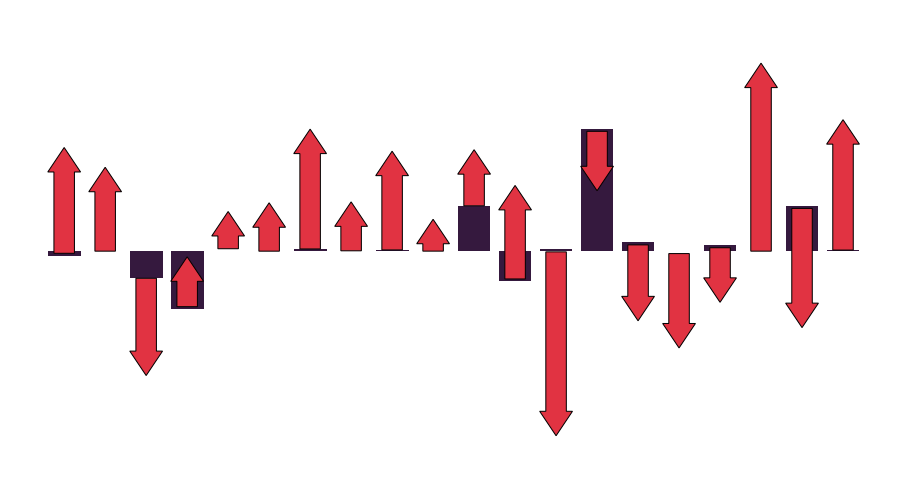

In [12]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.bar(np.arange(20), grad, color=palette[0])
plt.ylim(-2, 2)
plt.axis("off")


for i in range(20):
    if noise[i] * grad[i] < 0:
        offset = grad[i] - 0.02 * np.sign(grad[i])
    else:
        offset = grad[i]
        
    plt.arrow(i, offset, 0, noise[i], 
              head_width=0.8, head_length=0.2, width=0.5, 
              facecolor=palette[3], 
              edgecolor="black")
    
plt.savefig("private_gradient.pdf", bbox_inches="tight")

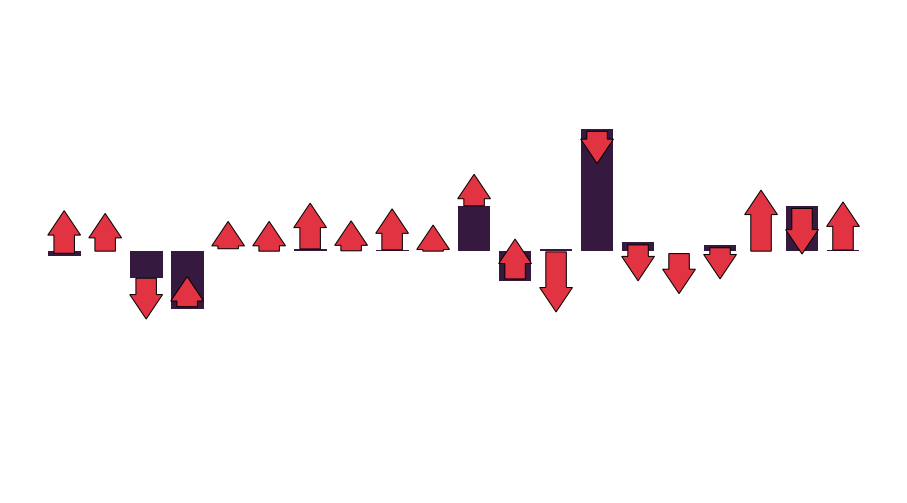

In [13]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.bar(np.arange(20), grad, color=palette[0])
plt.ylim(-2, 2)
plt.axis("off")


for i in range(20):
    if noise[i] * grad[i] < 0:
        offset = grad[i] - 0.02 * np.sign(grad[i])
    else:
        offset = grad[i]
        
    plt.arrow(i, offset, 0, noise_small[i], 
              head_width=0.8, head_length=0.2, width=0.5, 
              facecolor=palette[3], 
              edgecolor="black")
    
plt.savefig("private_gradient_choice.pdf", bbox_inches="tight")

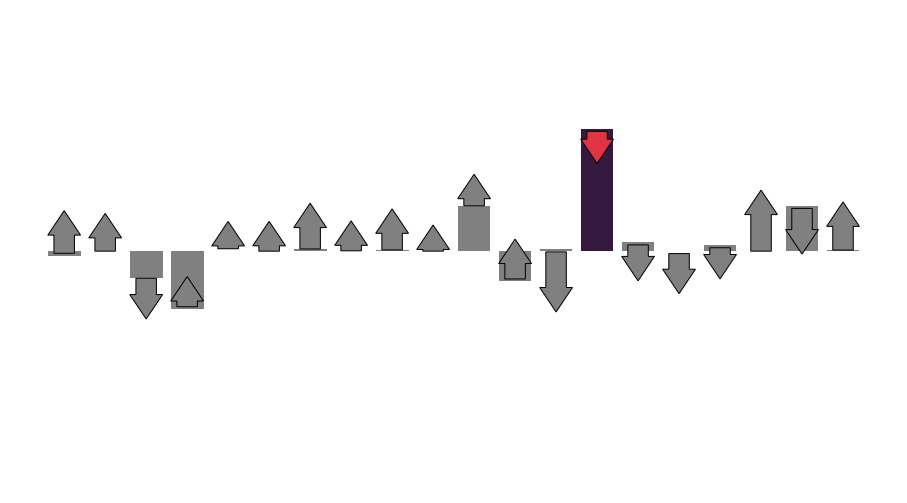

In [14]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
jmax = np.argmax(np.abs(grad + noise_small))

plt.bar(np.arange(20), grad, color=["grey" if i!=jmax else palette[0] for i in range(20)])
plt.ylim(-2, 2)
plt.axis("off")

for i in range(20):
    if noise[i] * grad[i] < 0:
        offset = grad[i] - 0.02 * np.sign(grad[i])
    else:
        offset = grad[i]
        
    plt.arrow(i, offset, 0, noise_small[i], 
              head_width=0.8, head_length=0.2, width=0.5, 
              facecolor="grey" if i!=jmax else palette[3],
              edgecolor="black")
    
    
plt.savefig("private_gradient_choice.pdf", bbox_inches="tight")

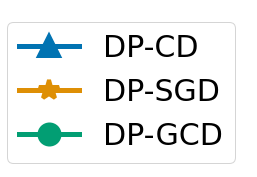

In [42]:
palette_cb = sns.color_palette("colorblind")

fig, ax = plt.subplots(1,1,figsize=(2,3))

hdl1, = plt.plot([0],[0],lw=5,color=palette_cb[0], marker="^", markersize=20, markeredgewidth=4)
hdl2, = plt.plot([0],[0],lw=5,color=palette_cb[1], marker="*", markersize=20, markeredgewidth=4)
hdl3, = plt.plot([0],[0],lw=5,color=palette_cb[2], marker="o", markersize=20, markeredgewidth=4)

ax.set_ylim(-100,-60)
ax.axis("off")

ax.legend([hdl1,hdl2,hdl3],["DP-CD", "DP-SGD", "DP-GCD"],
         fontsize=30)

fig.savefig("plot_legend.pdf", bbox_inches="tight")

## 